### Load libraries

In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Load dataset

In [15]:
df = pd.read_csv("./dataset/train.csv")

In [16]:
df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


### Data Analysis

In [17]:
#Data types
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [18]:
print(df.shape)

(8693, 14)


Cantidad de muestras: [4315, 4378]


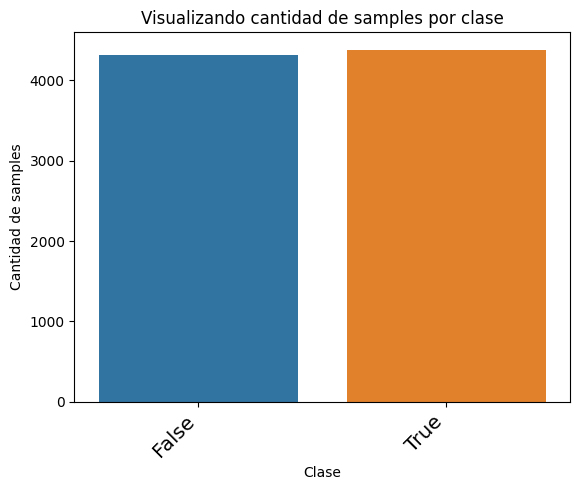

In [19]:
#Analysis of target samples
class_samples = []
for i in df['Transported'].unique().tolist():
    class_samples.append(df[df['Transported']==i].shape[0])
    
sns.barplot(x = df['Transported'].unique().tolist(), y = class_samples)
plt.ylabel("Cantidad de samples")
plt.xlabel("Clase")
plt.title("Visualizando cantidad de samples por clase")
plt.xticks(rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large")

print(f"Cantidad de muestras: {class_samples}")

Acording with Kaggle, the feature Cabin is a join between Deck, Num and Side, for this reason that feature can be descomposed
in three different features.

### Data Transform

It's no necessary include the columns name and PassengerId

In [20]:
#Erase of column Name and PassengerId
try:
    df = df.drop(["Name","PassengerId"],axis=1)
except:
    pass
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [21]:
# Division of Cabin
try:
    df[["Deck", "Cabin_num", "Side"]] = df["Cabin"].str.split("/", expand=True)
    df = df.drop(["Cabin"],axis=1)
except:
    print("The columns doesn't exist")
df.sample(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
616,Europa,True,55 Cancri e,30.0,False,0.0,0.0,0.0,0.0,0.0,True,C,25,S
194,Earth,False,TRAPPIST-1e,38.0,False,1517.0,0.0,0.0,27.0,0.0,False,F,47,P
7676,Earth,False,TRAPPIST-1e,18.0,False,0.0,0.0,662.0,30.0,0.0,True,F,1567,S
615,Europa,False,TRAPPIST-1e,79.0,False,0.0,0.0,0.0,2210.0,2.0,False,C,25,S
7752,Mars,True,TRAPPIST-1e,4.0,False,0.0,0.0,0.0,0.0,0.0,True,F,1587,S


In the dataset exist some empty data, is necessary eliminate that values.

In [22]:
# Clean empty data
df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [23]:
df.isnull().sum().sort_values(ascending=False)

HomePlanet      201
Deck            199
Cabin_num       199
Side            199
Destination     182
RoomService     181
Age             179
CryoSleep         0
VIP               0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [24]:
import warnings
warnings.simplefilter("ignore")

#Convertion of cabin_num
index_cabin_null = df[df["Cabin_num"].isnull()].index
df["Cabin_num"] = df["Cabin_num"].fillna(value=0)
df["Cabin_num"] = df["Cabin_num"].astype(int)
for i in index_cabin_null:
    df["Cabin_num"][i] = None

#It's necessary convert the boolean data types too
df[["VIP","CryoSleep"]] = df[["VIP","CryoSleep"]].astype(int)

print(f"New types:\n {df.dtypes}")

New types:
 HomePlanet       object
CryoSleep         int32
Destination      object
Age             float64
VIP               int32
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
Deck             object
Cabin_num       float64
Side             object
dtype: object


### Save dataset
This process saves the changes realised in the last section

In [25]:
df.to_csv('./dataset/transformed_train.csv', encoding='utf-8',index=False)